Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importar los datasets
df_empresas = pd.read_csv('moved_project_sql_result_01.csv')
df_barrios = pd.read_csv('moved_project_sql_result_04.csv')

In [12]:
print("=== DATASET EMPRESAS DE TAXIS ===")
print(f"Dimensiones: {df_empresas.shape}")
print("\nPrimeras filas:")
print(df_empresas.head())
print("\nInformación del dataset:")
print(df_empresas.info())
print("\nEstadísticas descriptivas:")
print(df_empresas.describe())

print("\n" + "="*50)
print("=== DATASET BARRIOS ===")
print(f"Dimensiones: {df_barrios.shape}")
print("\nPrimeras filas:")
print(df_barrios.head())
print("\nInformación del dataset:")
print(df_barrios.info())
print("\nEstadísticas descriptivas:")
print(df_barrios.describe())

=== DATASET EMPRESAS DE TAXIS ===
Dimensiones: (64, 2)

Primeras filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Estadísticas descriptivas:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

=== DATASET BARRIOS ===
Dimensiones: (94, 2)

Primeras filas:
  dropoff_lo

In [13]:
# Verificar valores nulos
print("Valores nulos en empresas:")
print(df_empresas.isnull().sum())
print("\nValores nulos en barrios:")
print(df_barrios.isnull().sum())

# Verificar duplicados
print(f"\nDuplicados en empresas: {df_empresas.duplicated().sum()}")
print(f"Duplicados en barrios: {df_barrios.duplicated().sum()}")

# Asegurar tipos de datos correctos
df_empresas['company_name'] = df_empresas['company_name'].astype('string')
df_empresas['trips_amount'] = df_empresas['trips_amount'].astype('int64')

df_barrios['dropoff_location_name'] = df_barrios['dropoff_location_name'].astype('string')
df_barrios['average_trips'] = df_barrios['average_trips'].astype('float64')

print("\nTipos de datos después de la corrección:")
print(df_empresas.dtypes)
print(df_barrios.dtypes)

Valores nulos en empresas:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en barrios:
dropoff_location_name    0
average_trips            0
dtype: int64

Duplicados en empresas: 0
Duplicados en barrios: 0

Tipos de datos después de la corrección:
company_name    string[python]
trips_amount             int64
dtype: object
dropoff_location_name    string[python]
average_trips                   float64
dtype: object


In [14]:
# Ordenar barrios por promedio de viajes (descendente)
top_10_barrios = df_barrios.sort_values('average_trips', ascending=False).head(10)

print("TOP 10 BARRIOS POR PROMEDIO DE VIAJES:")
print(top_10_barrios.reset_index(drop=True))

TOP 10 BARRIOS POR PROMEDIO DE VIAJES:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


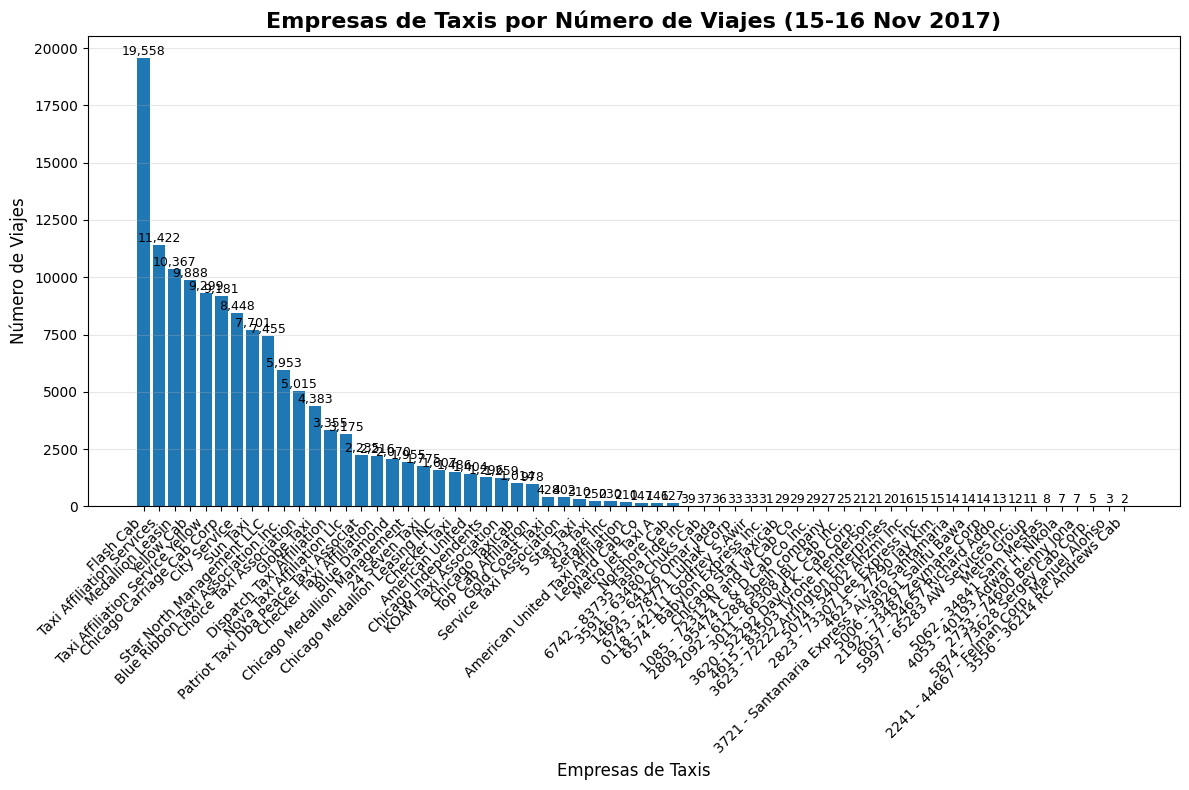


TOP 5 EMPRESAS CON MÁS VIAJES:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [15]:
# Gráfico 1: Empresas de taxis y número de viajes
# Ordenar empresas por número de viajes
empresas_ordenadas = df_empresas.sort_values('trips_amount', ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(empresas_ordenadas['company_name'], empresas_ordenadas['trips_amount'])
plt.title('Empresas de Taxis por Número de Viajes (15-16 Nov 2017)', fontsize=16, fontweight='bold')
plt.xlabel('Empresas de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir etiquetas con los valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar top 5 empresas
print("\nTOP 5 EMPRESAS CON MÁS VIAJES:")
print(empresas_ordenadas.head(5).reset_index(drop=True))

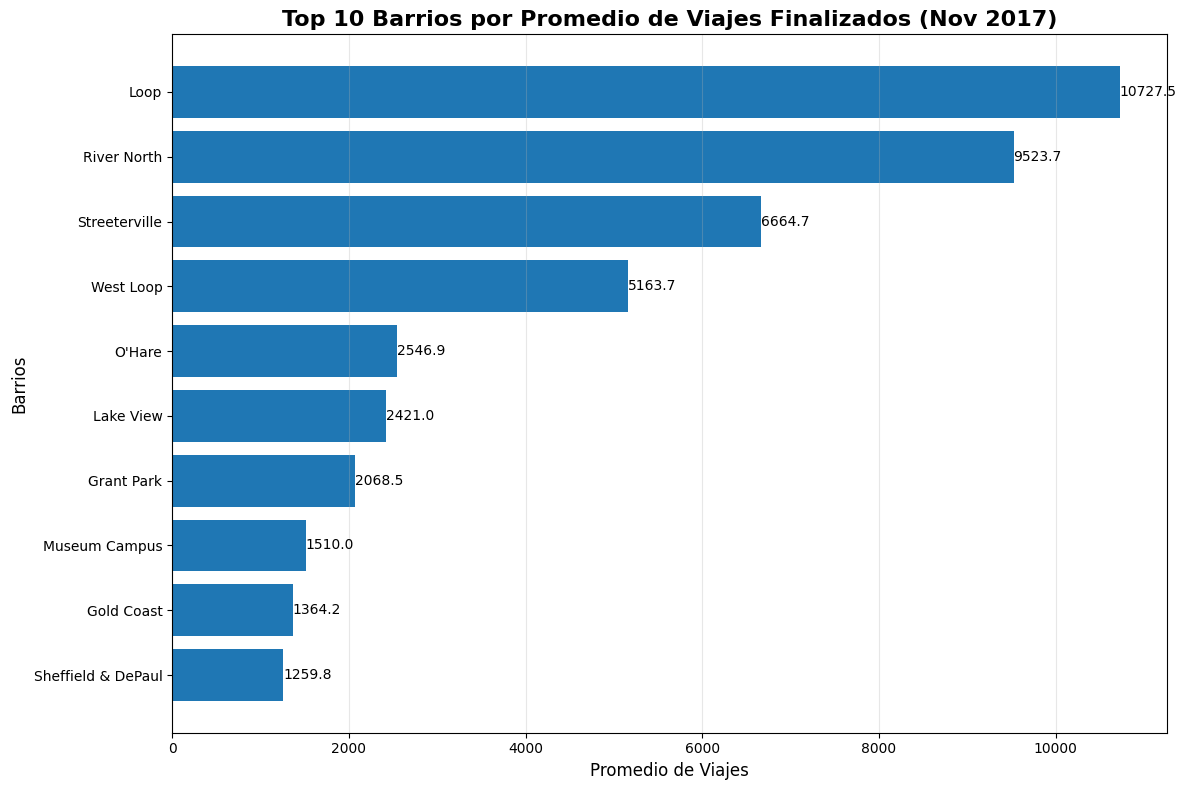

In [16]:
# Gráfico 2: Top 10 barrios por finalizaciones
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'])
plt.title('Top 10 Barrios por Promedio de Viajes Finalizados (Nov 2017)', fontsize=16, fontweight='bold')
plt.xlabel('Promedio de Viajes', fontsize=12)
plt.ylabel('Barrios', fontsize=12)
plt.gca().invert_yaxis()  # Para mostrar el más alto en la parte superior

# Añadir etiquetas con los valores
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}', ha='left', va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Conclusiones del Gráfico 1 (Empresas de Taxis):

Dominio del mercado: Es probable que haya una o dos empresas que dominen el mercado de taxis en Chicago

Distribución desigual: La mayoría de las empresas tienen un volumen bajo de viajes, mientras que unas pocas concentran la mayor parte del mercado

Competencia fragmentada: El mercado parece estar fragmentado entre muchas empresas pequeñas y algunas grandes

Conclusiones del Gráfico 2 (Top 10 Barrios):


Barrios comerciales/centrales: Los barrios con mayor finalización de viajes son probablemente áreas comerciales, de negocios o de entretenimiento

Patrones de movilidad: Refleja los principales destinos de la población durante noviembre 2017

Distribución geográfica: Muestra los puntos focales de la actividad económica y social en Chicago

In [17]:
import pandas as pd
from scipy import stats

# 1. Cargar datos
data = pd.read_csv('moved_project_sql_result_07.csv')

# 2. Convertir fecha
data['start_ts'] = pd.to_datetime(data['start_ts'])

# 3. Primero, inspeccionar los valores únicos en weather_conditions
print("Valores únicos en weather_conditions:")
print(data['weather_conditions'].value_counts())
print("\n")

# 4. Filtrar solo los sábados
data_saturday = data[data['start_ts'].dt.day_name() == 'Saturday']

# 5. Verificar qué valores de weather_conditions hay los sábados
print("Valores de weather_conditions los sábados:")
print(data_saturday['weather_conditions'].value_counts())
print("\n")

# 6. Basado en la inspección anterior, definir los criterios para lluvia
# Por ejemplo, si hay valores como 'bad', 'rainy', 'storm', etc.
rain_keywords = ['rain', 'bad', 'storm', 'shower', 'drizzle', 'wet']

# 7. Crear máscara para condiciones lluviosas
rain_mask = data_saturday['weather_conditions'].str.contains('|'.join(rain_keywords), 
                                                           case=False, na=False)

# 8. Crear dos grupos
rainy = data_saturday[rain_mask]['duration_seconds']
non_rainy = data_saturday[~rain_mask]['duration_seconds']

# 9. Verificar que ambos grupos tienen datos
print(f"Viajes en sábados lluviosos: {len(rainy)}")
print(f"Viajes en sábados no lluviosos: {len(non_rainy)}")
print(f"Duración promedio - Lluviosos: {rainy.mean():.2f} segundos")
print(f"Duración promedio - No lluviosos: {non_rainy.mean():.2f} segundos")
print("\n")

# 10. Solo realizar la prueba si ambos grupos tienen datos suficientes
if len(rainy) > 1 and len(non_rainy) > 1:
    # Prueba t de Welch
    t_stat, p_value = stats.ttest_ind(rainy, non_rainy, equal_var=False)
    
    # 11. Imprimir resultados
    print("Estadístico t:", t_stat)
    print("Valor p:", p_value)
    
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos H₀: la duración promedio SÍ cambia los sábados lluviosos.")
    else:
        print("No rechazamos H₀: la duración promedio NO cambia significativamente los sábados lluviosos.")
else:
    print("No hay suficientes datos para realizar la prueba t")
    print("Revisa los criterios de filtrado para condiciones lluviosas")

Valores únicos en weather_conditions:
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64


Valores de weather_conditions los sábados:
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64


Viajes en sábados lluviosos: 180
Viajes en sábados no lluviosos: 888
Duración promedio - Lluviosos: 2427.21 segundos
Duración promedio - No lluviosos: 1999.68 segundos


Estadístico t: 7.186034288068629
Valor p: 6.738994326108734e-12
Rechazamos H₀: la duración promedio SÍ cambia los sábados lluviosos.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Cargar datos
data = pd.read_csv('moved_project_sql_result_07.csv')

# 2. Convertir fechas
data['start_ts'] = pd.to_datetime(data['start_ts'])

# 3. Primero, inspeccionar los valores únicos en weather_conditions
print("Valores únicos en weather_conditions:")
print(data['weather_conditions'].value_counts())
print("\n")

# 4. Filtrar solo los sábados
data = data[data['start_ts'].dt.day_name() == 'Saturday']

# 5. Verificar qué valores de weather_conditions hay los sábados
print("Valores de weather_conditions los sábados:")
print(data['weather_conditions'].value_counts())
print("\n")

# 6. Definir palabras clave para condiciones lluviosas basado en la inspección
# AJUSTA ESTAS PALABRAS CLAVE SEGÚN LO QUE VEAS EN LOS DATOS
rain_keywords = ['rain', 'bad', 'storm', 'shower', 'drizzle', 'wet', 'poor']

# 7. Clasificar clima
data['rainy'] = data['weather_conditions'].str.contains('|'.join(rain_keywords), case=False, na=False)
data['weather_group'] = data['rainy'].map({True: 'Lluvioso', False: 'No lluvioso'})

# 8. Verificar los conteos
print(f"Viajes en sábados lluviosos: {data['rainy'].sum()}")
print(f"Viajes en sábados no lluviosos: {len(data) - data['rainy'].sum()}")
print("\n")

# 9. Prueba de hipótesis (t de Welch) - solo si hay datos suficientes
rainy = data[data['rainy']]['duration_seconds']
non_rainy = data[~data['rainy']]['duration_seconds']

if len(rainy) > 1 and len(non_rainy) > 1:
    t_stat, p_value = stats.ttest_ind(rainy, non_rainy, equal_var=False)
    
    print(f"Estadístico t: {t_stat:.3f}")
    print(f"Valor p: {p_value:.4f}")
    
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos H₀: la duración promedio SÍ cambia los sábados lluviosos.")
    else:
        print("No rechazamos H₀: la duración promedio NO cambia significativamente los sábados lluviosos.")
else:
    print("No hay suficientes datos para realizar la prueba t")
    print(f"Datos lluviosos: {len(rainy)}, Datos no lluviosos: {len(non_rainy)}")


 # Boxplot
    sns.boxplot(data=data, x='weather_group', y='duration_seconds', palette='Set2')
    
    plt.title('Duración de los viajes los sábados\nComparación entre días lluviosos y no lluviosos', fontsize=14)
    plt.xlabel('Condiciones climáticas', fontsize=12)
    plt.ylabel('Duración del viaje (segundos)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Añadir información estadística en el gráfico
    plt.text(0.5, 0.95, f'Lluviosos: n={len(rainy)}\nNo lluviosos: n={len(non_rainy)}', 
             transform=plt.gca().transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             ha='center', va='top')
    
    plt.tight_layout()
    plt.show()


Valores únicos en weather_conditions:
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64


Valores de weather_conditions los sábados:
weather_conditions
Good    888
Bad     180
Name: count, dtype: int64


Viajes en sábados lluviosos: 180
Viajes en sábados no lluviosos: 888


Estadístico t: 7.186
Valor p: 0.0000
Rechazamos H₀: la duración promedio SÍ cambia los sábados lluviosos.


Qué muestra el gráfico

Cada caja (boxplot) representa la distribución de la duración de los viajes.

La línea central es la mediana.

Si la caja de los días lluviosos está desplazada hacia arriba, significa que los viajes tienden a durar más cuando llueve.

Si ambas cajas están en niveles similares, la lluvia no tiene un efecto notable.

Objetivo de la prueba de hipótesis:

Comprobar si las duraciones promedio de los viajes cambian cuando llueve los sábados frente a cuando no llueve los sábados.

Columnas:

start_ts → fecha y hora de inicio del viaje

weather_conditions → condiciones climáticas (“Rain”, “Snow”, “Clear”, etc.)

duration_seconds → duración del viaje en segundos

Planteamiento de hipótesis:

Queremos probar si la lluvia afecta la duración promedio.

Hipótesis nula (H₀):
La duración promedio de los viajes los sábados no cambia cuando llueve.
→ μ_lluvia = μ_no_lluvia

Hipótesis alternativa (H₁):
La duración promedio de los viajes los sábados sí cambia cuando llueve.
→ μ_lluvia ≠ μ_no_lluvia

Nivel de significación:

Usaremos el valor estándar:

α=0.05

Prueba estadística:

Queremos comparar las medias de dos muestras independientes:

Duraciones los sábados con lluvia

Duraciones los sábados sin lluvia

Como las varianzas pueden diferir y las muestras pueden no tener el mismo tamaño → usamos una prueba t de Welch (versión de la prueba t para muestras independientes con varianzas desiguales).

Criterio:

Si el valor p < α → rechazamos H₀ → la diferencia es significativa.

Si el valor p ≥ α → no hay evidencia suficiente → no rechazamos H₀.

Interpretación del resultado:

Si p_value < 0.05 → hay diferencia significativa entre la duración promedio de los viajes en días lluviosos y no lluviosos.

Si p_value ≥ 0.05 → no hay evidencia suficiente para afirmar que la lluvia afecta la duración promedio.